In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [26]:
df = pd.read_csv('Crop_recommendation.csv')

In [27]:
print("=" * 50)
print("First 10 rows of data:")
print("=" * 50)
df.head(10)

First 10 rows of data:


,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
5,69,37,42,23.058049,83.370118,7.073454,251.055000,rice
6,69,55,38,22.708838,82.639414,5.700806,271.324860,rice
7,94,53,40,20.277744,82.894086,5.718627,241.974195,rice
8,89,54,38,24.515881,83.535216,6.685346,230.446236,rice
9,68,58,38,23.223974,83.033227,6.336254,221.209196,rice


In [28]:
df.shape

(2200, 8)

In [29]:
print("\n" + "=" * 50)
print("Data Information:")
print("=" * 50)
df.info()



Data Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [30]:
print("\n" + "=" * 50)
print("Descriptive Statistics:")
print("=" * 50)
df.describe()


Descriptive Statistics:


,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [31]:
print(f"\nData Shape: {df.shape}")


Data Shape: (2200, 8)


In [32]:
nall = df.isnull().sum()
print(nall)

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64


In [33]:
print("=" * 50)
print("Checking Duplicate Rows:")
print("=" * 50)
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")
if duplicates > 0:
    print("\nDisplaying some duplicate rows:")
    print(df[df.duplicated(keep=False)].sort_values(by=list(df.columns)).head(10))


Checking Duplicate Rows:
Number of duplicate rows: 0


In [34]:
print("\n" + "=" * 50)
print("Crop Types:")
print("=" * 50)
print(df['label'].value_counts())
print(f"\nNumber of different crops: {df['label'].nunique()}")


Crop Types:
label
rice           100
maize          100
chickpea       100
kidneybeans    100
pigeonpeas     100
mothbeans      100
mungbean       100
blackgram      100
lentil         100
pomegranate    100
banana         100
mango          100
grapes         100
watermelon     100
muskmelon      100
apple          100
orange         100
papaya         100
coconut        100
cotton         100
jute           100
coffee         100
Name: count, dtype: int64

Number of different crops: 22


In [35]:
print("\n" + "=" * 50)
print("Checking Illogical Values:")
print("=" * 50)
for col in ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']:
    zero_count = (df[col] == 0).sum()
    negative_count = (df[col] < 0).sum()
    if zero_count > 0 or negative_count > 0:
        print(f"{col}: {zero_count} zero values, {negative_count} negative values")


Checking Illogical Values:
N: 27 zero values, 0 negative values


In [36]:
numerical_features = df.select_dtypes(include=[np.number]).columns.tolist()

In [37]:
print("\n" + "=" * 50)
print("Checking Outliers:")
print("=" * 50)
for col in ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f"{col}: {len(outliers)} outliers (outside range {lower_bound:.2f} - {upper_bound:.2f})")


Checking Outliers:
N: 0 outliers (outside range -73.88 - 179.12)
P: 138 outliers (outside range -32.00 - 128.00)
K: 200 outliers (outside range -23.50 - 92.50)
temperature: 86 outliers (outside range 14.08 - 37.25)
humidity: 30 outliers (outside range 15.73 - 134.48)
ph: 57 outliers (outside range 4.54 - 8.35)
rainfall: 100 outliers (outside range -25.02 - 213.84)


In [38]:
print("=" * 50)
print("Rows with N = 0:")
print("=" * 50)
zero_n = df[df['N'] == 0]
print(f"Number of rows: {len(zero_n)}")
print("\nDistribution across crops:")
print(zero_n['label'].value_counts())
print("\nDisplaying all rows:")
print(zero_n)

Rows with N = 0:
Number of rows: 27

Distribution across crops:
label
orange         4
coconut        4
lentil         4
apple          3
mango          3
pomegranate    3
kidneybeans    2
mothbeans      1
pigeonpeas     1
mungbean       1
grapes         1
Name: count, dtype: int64

Displaying all rows:
      N    P    K  temperature   humidity        ph    rainfall        label
346   0   65   15    23.461683  23.221976  5.645436   95.842534  kidneybeans
382   0   55   22    22.986669  20.579406  5.916779  143.858494  kidneybeans
477   0   70   21    36.300497  56.030213  4.672437  101.607399   pigeonpeas
517   0   55   25    28.174894  43.667230  4.524172   45.781728    mothbeans
608   0   49   18    29.683617  87.935981  6.990095   41.824902     mungbean
829   0   65   24    28.495844  62.446162  7.841496   53.145310       lentil
875   0   69   21    25.869282  61.883211  7.072923   36.682840       lentil
878   0   74   17    23.333759  64.505158  7.240988   47.015107       lentil
89

In [39]:
print("\n" + "=" * 50)
print("Statistics for rows with N=0:")
print("=" * 50)
print(zero_n.describe())


Statistics for rows with N=0:
          N           P           K  temperature   humidity         ph  \
count  27.0   27.000000   27.000000    27.000000  27.000000  27.000000   
mean    0.0   51.888889   50.777778    26.319673  74.811687   6.276641   
std     0.0   40.843353   64.495875     4.842624  23.032282   0.825161   
min     0.0    5.000000    7.000000    19.335168  20.579406   4.524172   
25%     0.0   20.000000   19.500000    22.776656  58.956712   5.749706   
50%     0.0   36.000000   26.000000    25.070725  89.901470   6.279134   
75%     0.0   68.000000   34.500000    29.089730  91.993494   6.914545   
max     0.0  145.000000  205.000000    36.300497  98.367098   7.841496   

         rainfall  
count   27.000000  
mean   105.110941  
std     45.083513  
min     36.682840  
25%     78.797267  
50%    105.529185  
75%    116.631759  
max    204.720657  


In [40]:
numeric_cols = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']
print("=" * 70)
print("Average Requirements per Crop:")
print("=" * 70)
crop_stats = df.groupby('label')[numeric_cols].mean().round(2)
print(crop_stats)

Average Requirements per Crop:
                  N       P       K  temperature  humidity    ph  rainfall
label                                                                     
apple         20.80  134.22  199.89        22.63     92.33  5.93    112.65
banana       100.23   82.01   50.05        27.38     80.36  5.98    104.63
blackgram     40.02   67.47   19.24        29.97     65.12  7.13     67.88
chickpea      40.09   67.79   79.92        18.87     16.86  7.34     80.06
coconut       21.98   16.93   30.59        27.41     94.84  5.98    175.69
coffee       101.20   28.74   29.94        25.54     58.87  6.79    158.07
cotton       117.77   46.24   19.56        23.99     79.84  6.91     80.40
grapes        23.18  132.53  200.11        23.85     81.88  6.03     69.61
jute          78.40   46.86   39.99        24.96     79.64  6.73    174.79
kidneybeans   20.75   67.54   20.05        20.12     21.61  5.75    105.92
lentil        18.77   68.36   19.41        24.51     64.80  6.93     

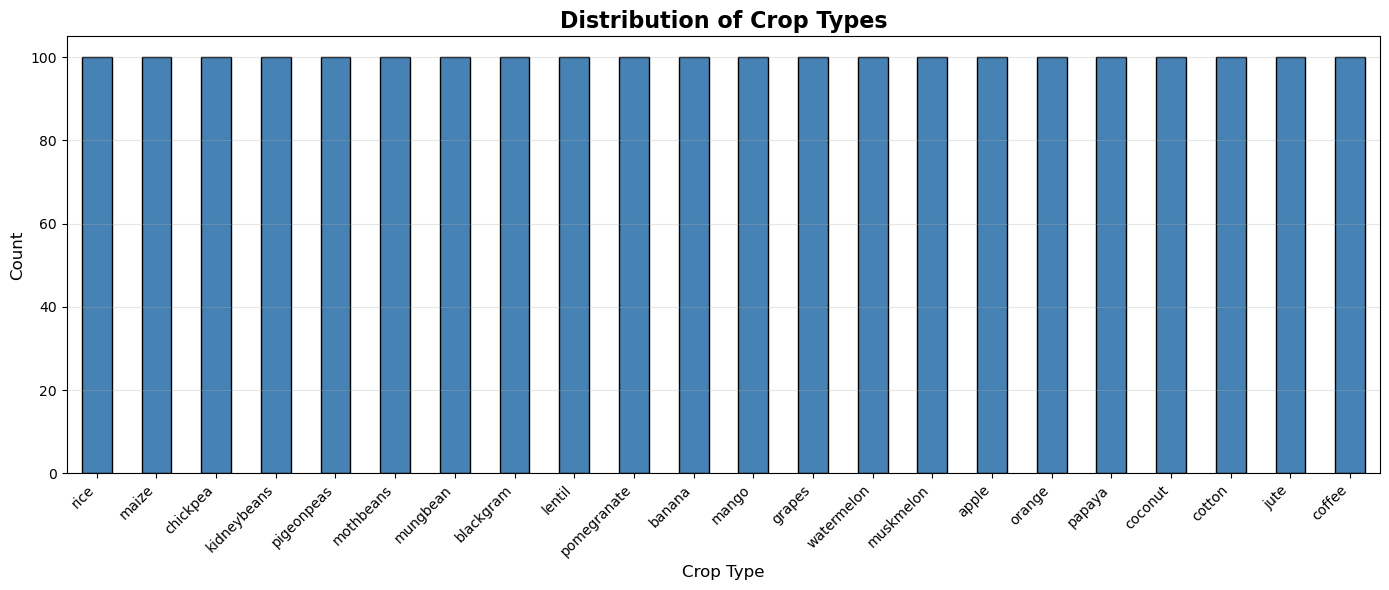

In [41]:
plt.figure(figsize=(14, 6))
df['label'].value_counts().plot(kind='bar', color='steelblue', edgecolor='black')
plt.title('Distribution of Crop Types', fontsize=16, fontweight='bold')
plt.xlabel('Crop Type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

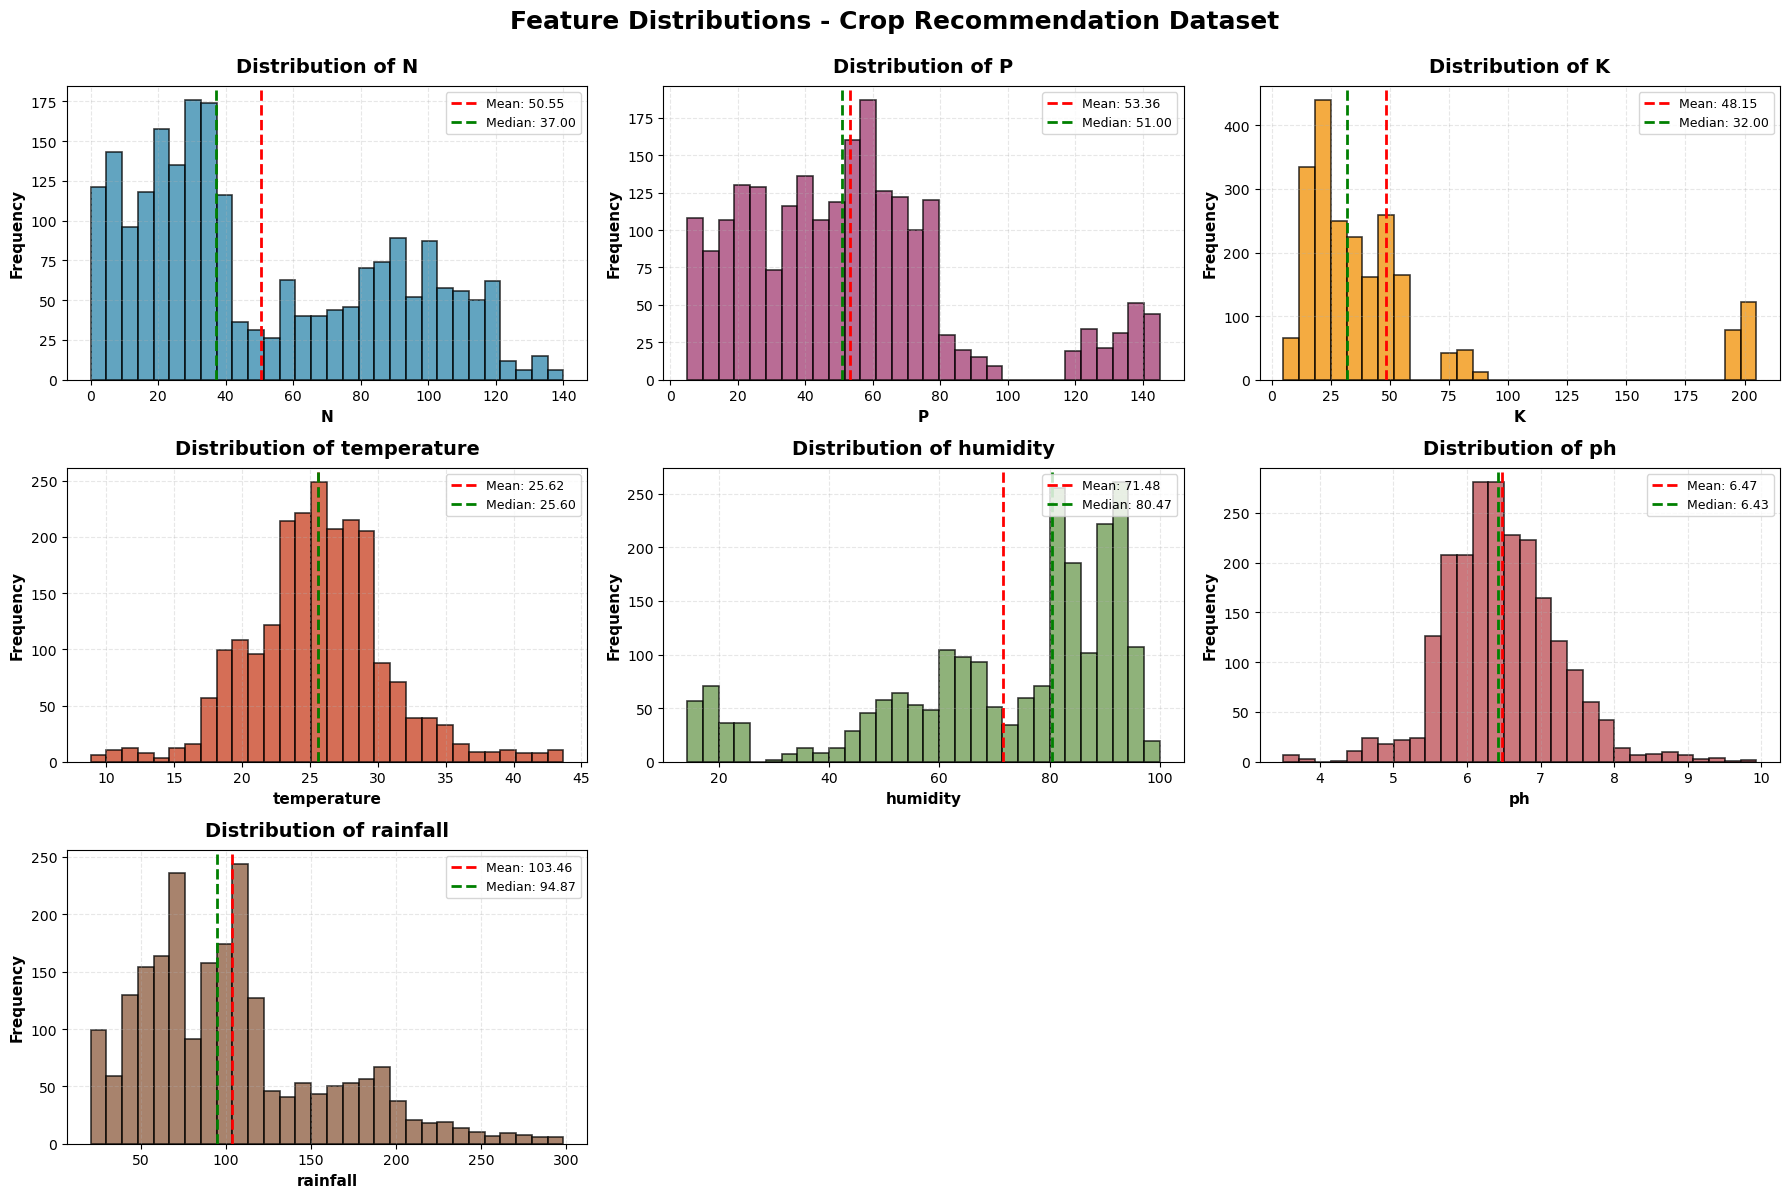


 All feature distributions plotted successfully!


In [42]:
# ============================================================
# Distribution of All Features - Improved Version
# ============================================================

features = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']

# Create subplots: 3 rows x 3 columns (7 plots + 2 empty spaces)
fig, axes = plt.subplots(3, 3, figsize=(18, 12))
axes = axes.flatten()  # Convert 2D array to 1D for easier iteration


colors = ['#2E86AB', '#A23B72', '#F18F01', '#C73E1D', '#6A994E', '#BC4B51', '#8B5A3C']


for idx, feature in enumerate(features):
    axes[idx].hist(df[feature], bins=30, color=colors[idx], 
                   edgecolor='black', alpha=0.75, linewidth=1.2)
    
    axes[idx].set_title(f'Distribution of {feature}', 
                       fontsize=14, fontweight='bold', pad=10)
    axes[idx].set_xlabel(feature, fontsize=11, fontweight='bold')
    axes[idx].set_ylabel('Frequency', fontsize=11, fontweight='bold')
    axes[idx].grid(alpha=0.3, linestyle='--')
    
    
    mean_val = df[feature].mean()
    median_val = df[feature].median()
    axes[idx].axvline(mean_val, color='red', linestyle='--', 
                     linewidth=2, label=f'Mean: {mean_val:.2f}')
    axes[idx].axvline(median_val, color='green', linestyle='--', 
                     linewidth=2, label=f'Median: {median_val:.2f}')
    axes[idx].legend(fontsize=9, loc='upper right')


for idx in range(len(features), 9):
    fig.delaxes(axes[idx])


fig.suptitle('Feature Distributions - Crop Recommendation Dataset', 
             fontsize=18, fontweight='bold', y=0.995)

plt.tight_layout()
plt.show()

print("\n" + "=" * 70)
print(" All feature distributions plotted successfully!")
print("=" * 70)

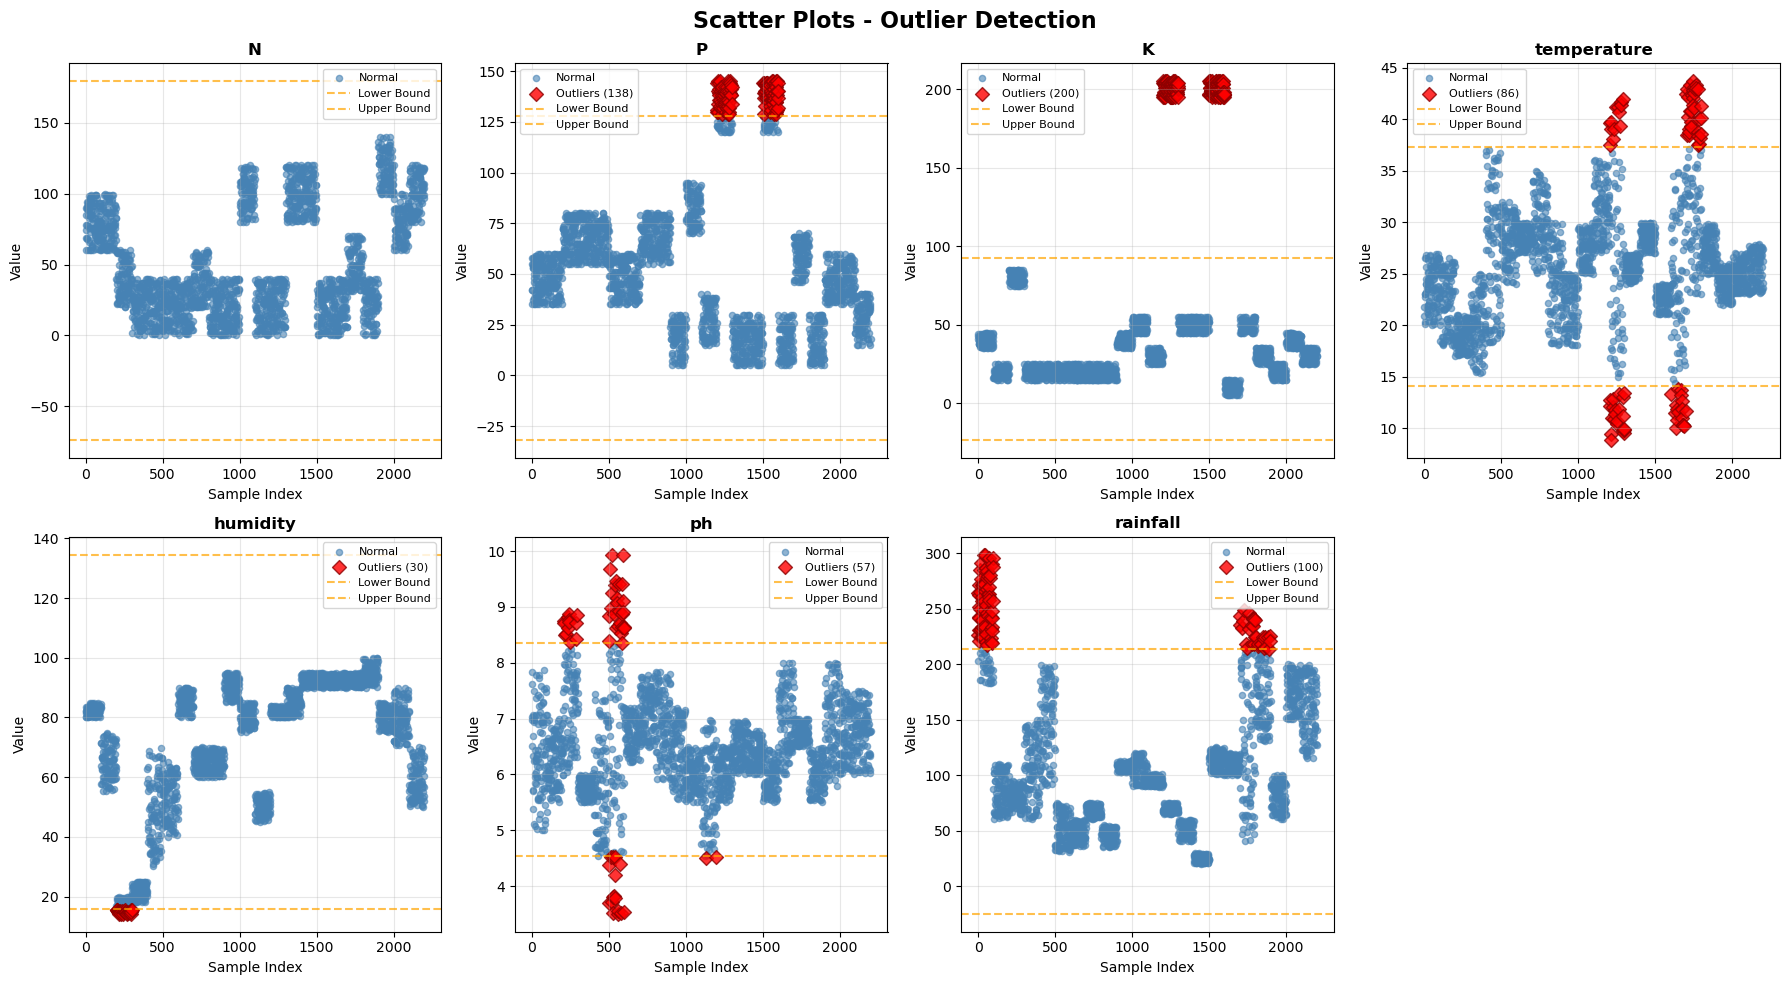

In [43]:
fig, axes = plt.subplots(2, 4, figsize=(18, 10))
axes = axes.flatten()

for idx, col in enumerate(numerical_features):
    
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    
    normal_mask = (df[col] >= lower_bound) & (df[col] <= upper_bound)
    outlier_mask = ~normal_mask
    
    
    x_values = np.arange(len(df))
    
    
    axes[idx].scatter(x_values[normal_mask], df[col][normal_mask], 
                     alpha=0.6, s=20, color='steelblue', label='Normal')
    
    
    if outlier_mask.sum() > 0:
        axes[idx].scatter(x_values[outlier_mask], df[col][outlier_mask], 
                         alpha=0.8, s=50, color='red', marker='D', 
                         label=f'Outliers ({outlier_mask.sum()})', edgecolors='darkred')
    
    
    axes[idx].axhline(y=lower_bound, color='orange', linestyle='--', 
                     linewidth=1.5, alpha=0.7, label='Lower Bound')
    axes[idx].axhline(y=upper_bound, color='orange', linestyle='--', 
                     linewidth=1.5, alpha=0.7, label='Upper Bound')
    
    axes[idx].set_title(f'{col}', fontsize=12, fontweight='bold')
    axes[idx].set_xlabel('Sample Index')
    axes[idx].set_ylabel('Value')
    axes[idx].legend(fontsize=8, loc='best')
    axes[idx].grid(alpha=0.3)

axes[-1].axis('off')
plt.suptitle('Scatter Plots - Outlier Detection', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

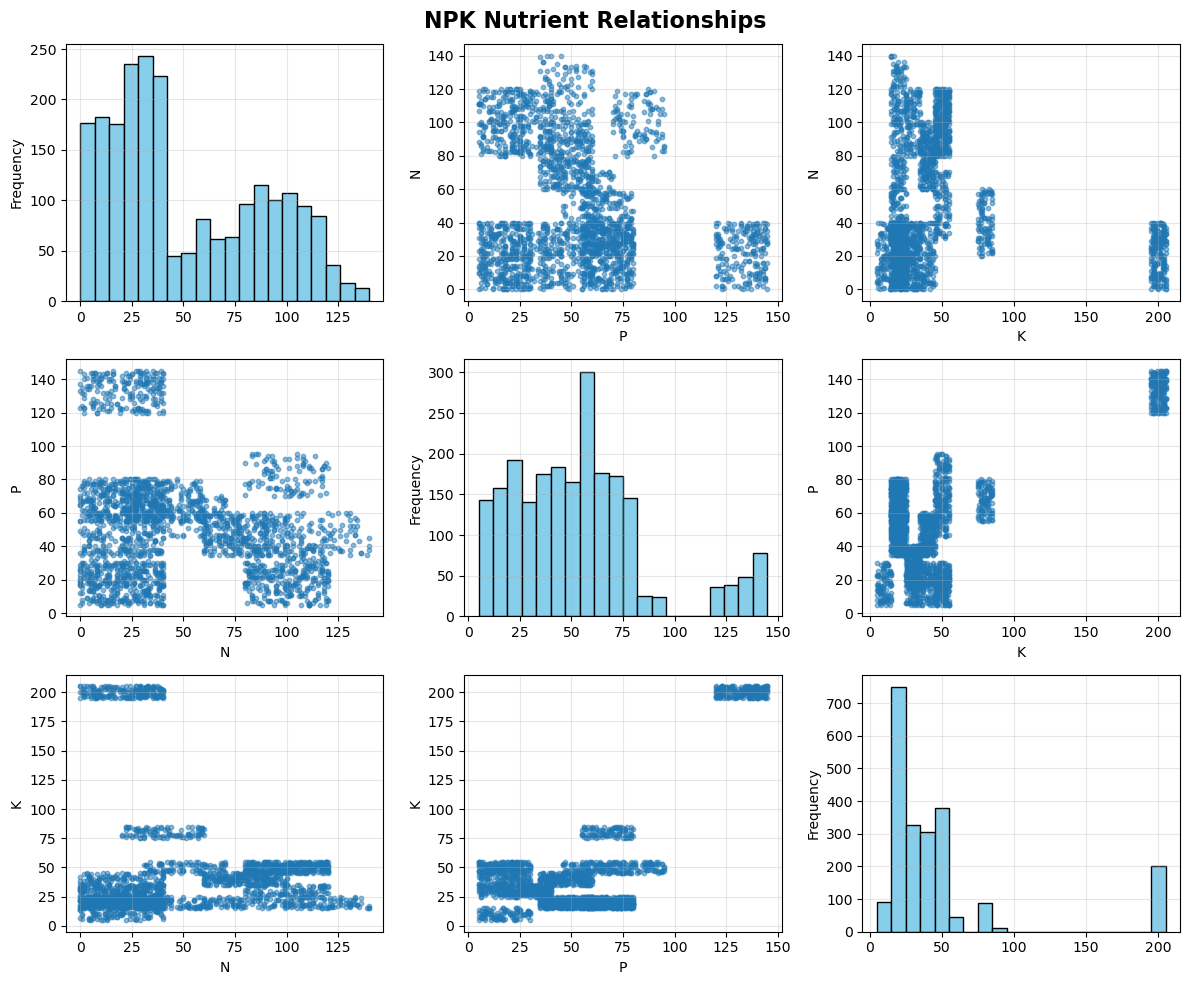

In [44]:
fig = plt.figure(figsize=(12, 10))
nutrients = ['N', 'P', 'K']
for i, nutrient1 in enumerate(nutrients):
    for j, nutrient2 in enumerate(nutrients):
        plt.subplot(3, 3, i*3 + j + 1)
        if i == j:
            plt.hist(df[nutrient1], bins=20, color='skyblue', edgecolor='black')
            plt.ylabel('Frequency')
        else:
            plt.scatter(df[nutrient2], df[nutrient1], alpha=0.5, s=10)
            plt.xlabel(nutrient2)
            plt.ylabel(nutrient1)
        plt.grid(alpha=0.3)
plt.suptitle('NPK Nutrient Relationships', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

In [45]:
print("=" * 70)
print("Final Data Quality Report")
print("=" * 70)
print("\n Data Size:")
print(f"   Number of rows: {df.shape[0]}")
print(f"   Number of columns: {df.shape[1]}")
print("\n Missing Values:")
missing = df.isnull().sum()
if missing.sum() == 0:
    print("  No missing values")
else:
    print(missing[missing > 0])
print("\n Duplicates:")
duplicates = df.duplicated().sum()
if duplicates == 0:
    print(" No duplicate rows")
else:
    print(f"   {duplicates} duplicate rows")
print("\n Data Types:")
print(df.dtypes)
print("\n Unique Values:")
print(f"   Number of crops: {df['label'].nunique()}")
print(f"   Balanced distribution: {'Yes' if df['label'].value_counts().std() == 0 else 'No'}")
print("\n Checking Logical Ranges:")
checks = {
    'N': (0, 150, df['N'].min(), df['N'].max()),
    'P': (0, 150, df['P'].min(), df['P'].max()),
    'K': (0, 210, df['K'].min(), df['K'].max()),
    'temperature': (0, 50, df['temperature'].min(), df['temperature'].max()),
    'humidity': (0, 100, df['humidity'].min(), df['humidity'].max()),
    'ph': (3, 10, df['ph'].min(), df['ph'].max()),
    'rainfall': (0, 300, df['rainfall'].min(), df['rainfall'].max())
}
all_valid = True
for col, (min_expected, max_expected, actual_min, actual_max) in checks.items():
    in_range = (actual_min >= min_expected) and (actual_max <= max_expected)
    status = "[OK]" if in_range else "[WARNING]"
    print(f"   {status} {col}: [{actual_min:.2f}, {actual_max:.2f}] (Expected: [{min_expected}, {max_expected}])")
    if not in_range:
        all_valid = False
print("\n" + "=" * 70)
print("Final Summary:")
print("=" * 70)
print("Data is clean and ready to use")
print("No missing values")
print("No duplicate rows")
print("Outliers are logical (natural variations between crops)")
print("Perfectly balanced distribution (100 rows per crop)")
print("Ranges are agriculturally logical")
print("\n" + "=" * 70)
print("Recommendations:")
print("=" * 70)
print("1. Data is ready for building a Machine Learning model")
print("2. No need to remove any rows or columns")
print("3. Outliers are natural and important for classification")
print("4. Can start directly with Feature Engineering or Modeling")

Final Data Quality Report

 Data Size:
   Number of rows: 2200
   Number of columns: 8

 Missing Values:
  No missing values

 Duplicates:
 No duplicate rows

 Data Types:
N                int64
P                int64
K                int64
temperature    float64
humidity       float64
ph             float64
rainfall       float64
label           object
dtype: object

 Unique Values:
   Number of crops: 22
   Balanced distribution: Yes

 Checking Logical Ranges:
   [OK] N: [0.00, 140.00] (Expected: [0, 150])
   [OK] P: [5.00, 145.00] (Expected: [0, 150])
   [OK] K: [5.00, 205.00] (Expected: [0, 210])
   [OK] temperature: [8.83, 43.68] (Expected: [0, 50])
   [OK] humidity: [14.26, 99.98] (Expected: [0, 100])
   [OK] ph: [3.50, 9.94] (Expected: [3, 10])
   [OK] rainfall: [20.21, 298.56] (Expected: [0, 300])

Final Summary:
Data is clean and ready to use
No missing values
No duplicate rows
Outliers are logical (natural variations between crops)
Perfectly balanced distribution (100 rows pe

In [46]:
from sklearn.preprocessing import LabelEncoder
l = LabelEncoder()
labels = l.fit_transform(df["label"])


In [47]:
x = df[numerical_features].values
y = labels
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size = 0.3, shuffle = True, random_state = 2)

In [48]:
log_model = LogisticRegression(max_iter=1000, random_state=2)
log_model.fit(x_train, y_train)

C:\Users\laptop\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000, random_state=2)

In [49]:
from sklearn.metrics import accuracy_score
y_predict = log_model.predict(x_test)
test_acc = accuracy_score(y_test, y_predict)  
print("=" * 50)
print("📊 Model Evaluation Results")
print("=" * 50)
print(f" Accuracy : {test_acc:.2%}")

📊 Model Evaluation Results
 Accuracy : 97.42%


In [50]:
print("\n" + "=" * 70)
print("MODEL EVALUATION SUMMARY")
print("=" * 70)
print(f" Model: Logistic Regression")
print(f" Accuracy: {test_acc*100:.2f}%")
print(f" Number of Crops: {len(l.classes_)}")



MODEL EVALUATION SUMMARY
 Model: Logistic Regression
 Accuracy: 97.42%
 Number of Crops: 22



📋 CLASSIFICATION REPORT
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        28
      banana       1.00      1.00      1.00        26
   blackgram       0.96      0.89      0.93        28
    chickpea       1.00      1.00      1.00        29
     coconut       1.00      1.00      1.00        31
      coffee       1.00      1.00      1.00        33
      cotton       0.94      0.94      0.94        31
      grapes       1.00      1.00      1.00        29
        jute       0.86      0.97      0.91        33
 kidneybeans       1.00      1.00      1.00        30
      lentil       0.94      1.00      0.97        32
       maize       0.94      0.94      0.94        32
       mango       1.00      1.00      1.00        33
   mothbeans       0.90      0.90      0.90        29
    mungbean       1.00      1.00      1.00        32
   muskmelon       1.00      1.00      1.00        30
      orange       1.00      1.00      1.00        42
  

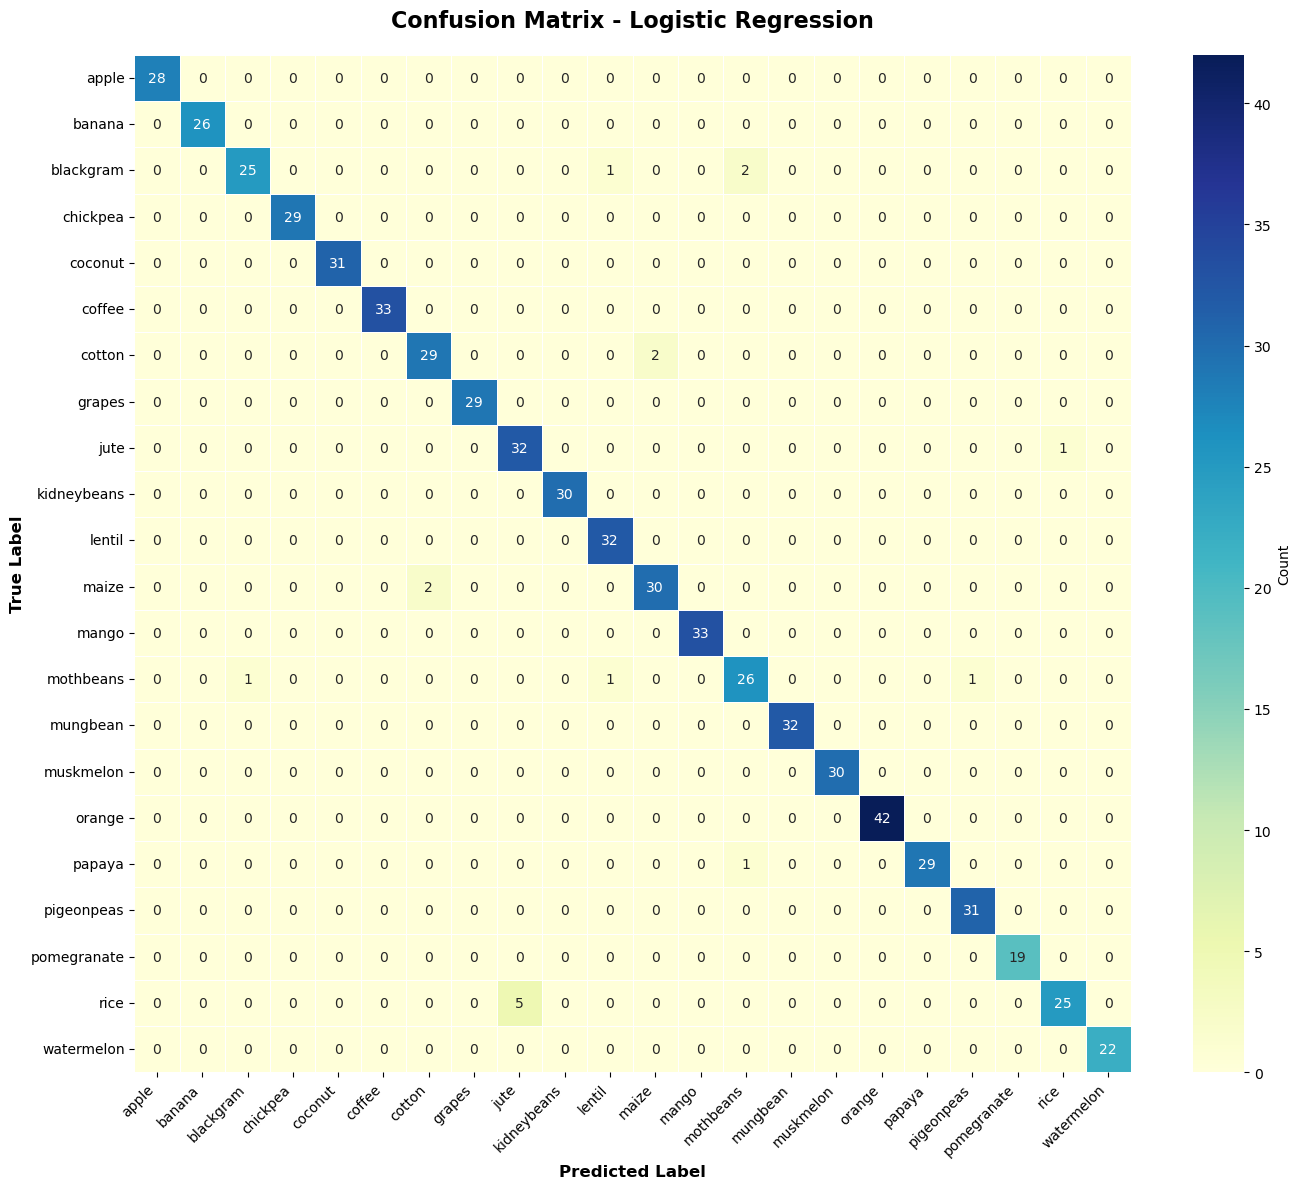


❌ Misclassified Samples: 17 out of 660
✅ Correctly Classified: 643 out of 660


In [51]:
# ============================================================
# STEP 1: Detailed Model Evaluation
# ============================================================

print("\n" + "=" * 70)
print("📋 CLASSIFICATION REPORT")
print("=" * 70)
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict, target_names=l.classes_))

# Confusion Matrix Visualization
print("\n" + "=" * 70)
print("🔍 CONFUSION MATRIX")
print("=" * 70)

plt.figure(figsize=(14, 12))
cm = confusion_matrix(y_test, y_predict)
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu', 
            xticklabels=l.classes_, yticklabels=l.classes_,
            cbar_kws={'label': 'Count'}, linewidths=0.5)
plt.title('Confusion Matrix - Logistic Regression', fontsize=16, fontweight='bold', pad=20)
plt.ylabel('True Label', fontsize=12, fontweight='bold')
plt.xlabel('Predicted Label', fontsize=12, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Calculate and display misclassified samples
misclassified = np.sum(y_test != y_predict)
print(f"\n❌ Misclassified Samples: {misclassified} out of {len(y_test)}")
print(f"✅ Correctly Classified: {len(y_test) - misclassified} out of {len(y_test)}")


 CROSS-VALIDATION ANALYSIS


C:\Users\laptop\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\laptop\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite


 Cross-Validation Scores (5-Fold):
   Fold 1: 0.9773 (97.73%)
   Fold 2: 0.9636 (96.36%)
   Fold 3: 0.9795 (97.95%)
   Fold 4: 0.9659 (96.59%)
   Fold 5: 0.9682 (96.82%)

📈 Summary Statistics:
   Mean CV Accuracy: 0.9709 (97.09%)
   Standard Deviation: 0.0063 (±0.63%)
   Min Score: 0.9636 (96.36%)
   Max Score: 0.9795 (97.95%)


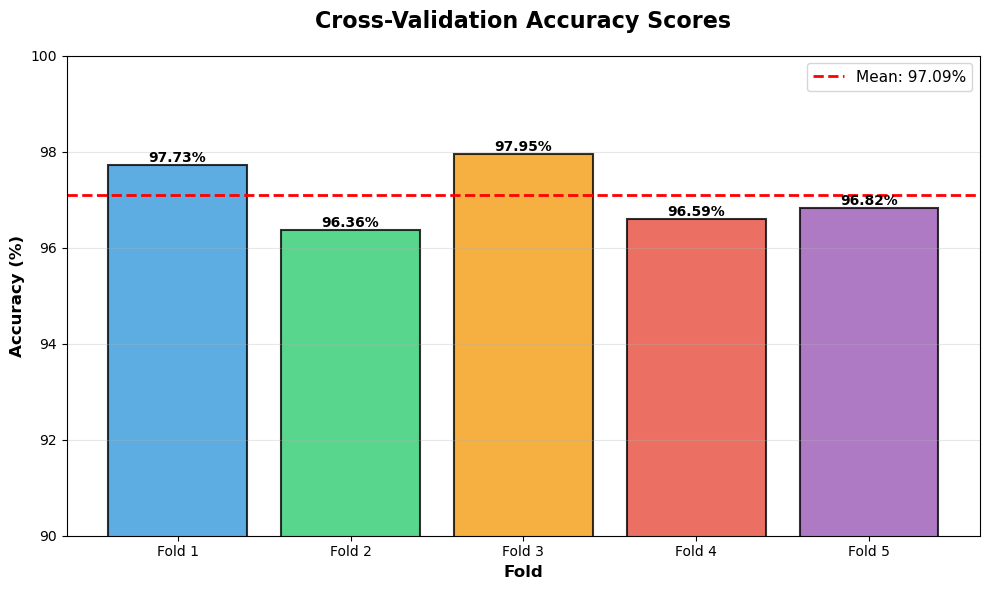


 Cross-validation shows the model is stable and generalizes well!


In [52]:
# ============================================================
# STEP 2: Cross-Validation for Better Evaluation
# ============================================================

print("\n" + "=" * 70)
print(" CROSS-VALIDATION ANALYSIS")
print("=" * 70)

# Perform 5-fold cross-validation
cv_scores = cross_val_score(log_model, x, y, cv=5, scoring='accuracy')

print(f"\n Cross-Validation Scores (5-Fold):")
for i, score in enumerate(cv_scores, 1):
    print(f"   Fold {i}: {score:.4f} ({score*100:.2f}%)")

print(f"\n📈 Summary Statistics:")
print(f"   Mean CV Accuracy: {cv_scores.mean():.4f} ({cv_scores.mean()*100:.2f}%)")
print(f"   Standard Deviation: {cv_scores.std():.4f} (±{cv_scores.std()*100:.2f}%)")
print(f"   Min Score: {cv_scores.min():.4f} ({cv_scores.min()*100:.2f}%)")
print(f"   Max Score: {cv_scores.max():.4f} ({cv_scores.max()*100:.2f}%)")

# Visualize CV scores
plt.figure(figsize=(10, 6))
folds = [f'Fold {i}' for i in range(1, 6)]
colors = ['#3498db', '#2ecc71', '#f39c12', '#e74c3c', '#9b59b6']
bars = plt.bar(folds, cv_scores * 100, color=colors, edgecolor='black', linewidth=1.5, alpha=0.8)
plt.axhline(y=cv_scores.mean() * 100, color='red', linestyle='--', linewidth=2, label=f'Mean: {cv_scores.mean()*100:.2f}%')
plt.title('Cross-Validation Accuracy Scores', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Fold', fontsize=12, fontweight='bold')
plt.ylabel('Accuracy (%)', fontsize=12, fontweight='bold')
plt.ylim([90, 100])
plt.legend(fontsize=11)
plt.grid(axis='y', alpha=0.3)

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.2f}%',
             ha='center', va='bottom', fontweight='bold', fontsize=10)

plt.tight_layout()
plt.show()

print("\n Cross-validation shows the model is stable and generalizes well!")

In [35]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [53]:
# ============================================================
# STEP 3: Comparing Multiple Models
# ============================================================

print("\n" + "=" * 70)
print(" COMPARING MULTIPLE MACHINE LEARNING MODELS")
print("=" * 70)


models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=2),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=2),
    'Support Vector Machine': SVC(kernel='rbf', random_state=2),
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5)
}


results = {}
model_objects = {}

print("\n Training and evaluating models...\n")

for name, model in models.items():
    
    model.fit(x_train, y_train)
    
    
    y_pred = model.predict(x_test)
    
    
    accuracy = accuracy_score(y_test, y_pred)
    
   
    cv_scores = cross_val_score(model, x, y, cv=5, scoring='accuracy')
    
    
    results[name] = {
        'Test Accuracy': accuracy,
        'CV Mean': cv_scores.mean(),
        'CV Std': cv_scores.std()
    }
    
    model_objects[name] = model
    
    print(f" {name}:")
    print(f"  Test Accuracy: {accuracy*100:.2f}%")
    print(f"  CV Mean: {cv_scores.mean()*100:.2f}% (±{cv_scores.std()*100:.2f}%)\n")


results_df = pd.DataFrame(results).T
results_df['Test Accuracy (%)'] = results_df['Test Accuracy'] * 100
results_df['CV Mean (%)'] = results_df['CV Mean'] * 100
results_df['CV Std (%)'] = results_df['CV Std'] * 100

print("=" * 70)
print(" MODEL COMPARISON SUMMARY")
print("=" * 70)
print(results_df[['Test Accuracy (%)', 'CV Mean (%)', 'CV Std (%)']].round(2))


best_model_name = results_df['CV Mean'].idxmax()
best_model = model_objects[best_model_name]
best_accuracy = results_df.loc[best_model_name, 'CV Mean (%)']

print(f"\n BEST MODEL: {best_model_name}")
print(f"   CV Accuracy: {best_accuracy:.2f}%")


fig, axes = plt.subplots(1, 2, figsize=(16, 6))


model_names = list(results.keys())
test_accuracies = [results[name]['Test Accuracy'] * 100 for name in model_names]
colors_bar = ['#3498db', '#2ecc71', '#e74c3c', '#f39c12']

bars = axes[0].bar(model_names, test_accuracies, color=colors_bar, edgecolor='black', linewidth=1.5, alpha=0.8)
axes[0].set_title('Test Accuracy Comparison', fontsize=14, fontweight='bold', pad=15)
axes[0].set_ylabel('Accuracy (%)', fontsize=11, fontweight='bold')
axes[0].set_ylim([90, 100])
axes[0].grid(axis='y', alpha=0.3)
axes[0].tick_params(axis='x', rotation=15)


for bar in bars:
    height = bar.get_height()
    axes[0].text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.2f}%', ha='center', va='bottom', fontweight='bold', fontsize=9)


cv_means = [results[name]['CV Mean'] * 100 for name in model_names]
cv_stds = [results[name]['CV Std'] * 100 for name in model_names]

bars2 = axes[1].bar(model_names, cv_means, yerr=cv_stds, color=colors_bar, 
                    edgecolor='black', linewidth=1.5, alpha=0.8, capsize=5, error_kw={'linewidth': 2})
axes[1].set_title('Cross-Validation Accuracy (Mean ± Std)', fontsize=14, fontweight='bold', pad=15)
axes[1].set_ylabel('Accuracy (%)', fontsize=11, fontweight='bold')
axes[1].set_ylim([90, 100])
axes[1].grid(axis='y', alpha=0.3)
axes[1].tick_params(axis='x', rotation=15)


for bar, mean_val in zip(bars2, cv_means):
    axes[1].text(bar.get_x() + bar.get_width()/2., mean_val,
                f'{mean_val:.2f}%', ha='center', va='bottom', fontweight='bold', fontsize=9)

plt.tight_layout()
plt.show()

print("\nModel comparison completed successfully!")


 COMPARING MULTIPLE MACHINE LEARNING MODELS


NameError: name 'RandomForestClassifier' is not defined


🌟 FEATURE IMPORTANCE ANALYSIS

📊 Feature Importance Ranking:
rainfall     | ███████████ 22.80%
humidity     | ██████████ 20.62%
K            | ████████ 17.31%
P            | ███████ 15.24%
N            | █████ 11.12%
temperature  | ███  7.87%
ph           | ██  5.04%

    Feature  Importance  Importance (%)
   rainfall    0.227982       22.798206
   humidity    0.206204       20.620402
          K    0.173114       17.311364
          P    0.152365       15.236477
          N    0.111217       11.121729
temperature    0.078676        7.867602
         ph    0.050442        5.044221


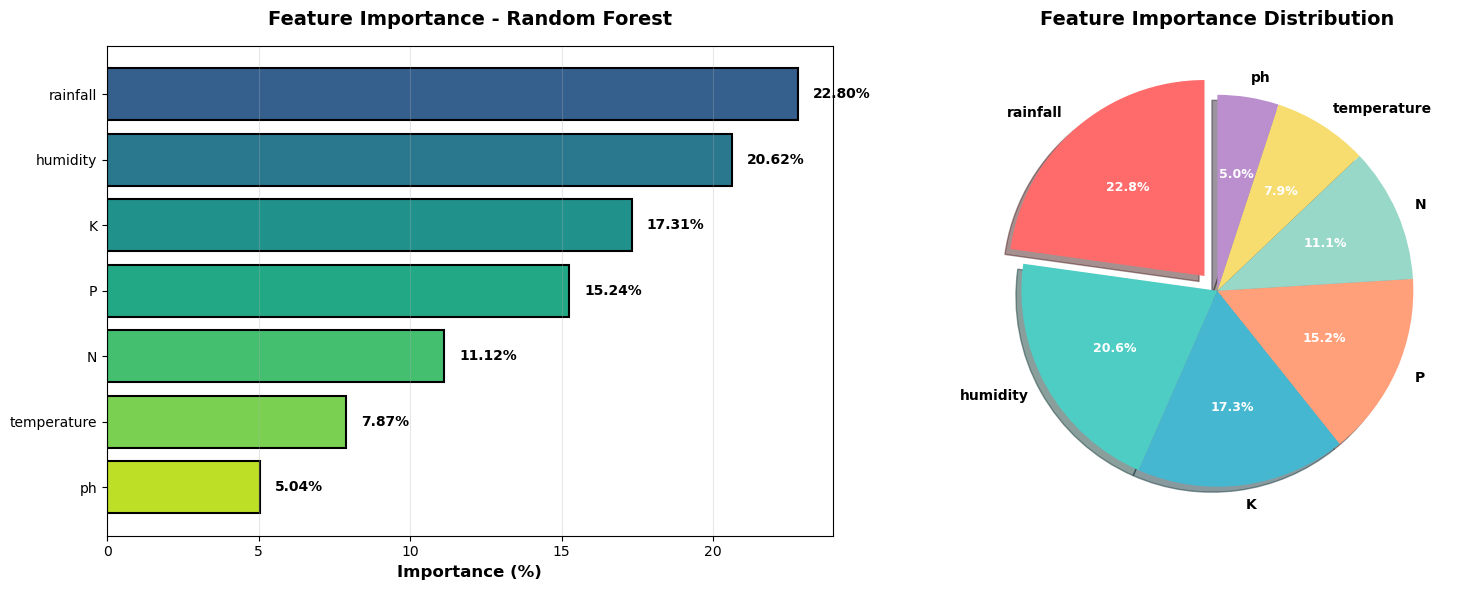


💡 KEY INSIGHTS:
✓ Most Important Feature: rainfall (22.80%)
✓ Least Important Feature: ph (5.04%)
✓ Top 3 Features contribute: 60.73% of total importance

✅ Feature importance analysis completed!


In [37]:
# ============================================================
# STEP 4: Feature Importance Analysis
# ============================================================

print("\n" + "=" * 70)
print("🌟 FEATURE IMPORTANCE ANALYSIS")
print("=" * 70)

# Get feature importance from Random Forest (best model)
feature_names = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']
rf_best = model_objects['Random Forest']
importances = rf_best.feature_importances_

# Create DataFrame for better visualization
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances,
    'Importance (%)': importances * 100
}).sort_values('Importance', ascending=False)

print("\n📊 Feature Importance Ranking:")
print("=" * 50)
for idx, row in importance_df.iterrows():
    bar_length = int(row['Importance (%)'] * 0.5)  # Scale for display
    bar = '█' * bar_length
    print(f"{row['Feature']:12s} | {bar} {row['Importance (%)']:5.2f}%")

print("\n" + "=" * 50)
print(importance_df.to_string(index=False))

# Visualizations
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Horizontal Bar Chart
colors_importance = plt.cm.viridis(np.linspace(0.3, 0.9, len(feature_names)))
bars = axes[0].barh(importance_df['Feature'], importance_df['Importance (%)'], 
                     color=colors_importance, edgecolor='black', linewidth=1.5)
axes[0].set_xlabel('Importance (%)', fontsize=12, fontweight='bold')
axes[0].set_title('Feature Importance - Random Forest', fontsize=14, fontweight='bold', pad=15)
axes[0].grid(axis='x', alpha=0.3)
axes[0].invert_yaxis()  # Highest at top

# Add value labels
for i, (bar, val) in enumerate(zip(bars, importance_df['Importance (%)'])):
    axes[0].text(val + 0.5, bar.get_y() + bar.get_height()/2, 
                f'{val:.2f}%', va='center', fontweight='bold', fontsize=10)

# Plot 2: Pie Chart
colors_pie = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFA07A', '#98D8C8', '#F7DC6F', '#BB8FCE']
explode = [0.1 if i == 0 else 0 for i in range(len(importance_df))]  # Explode the largest

wedges, texts, autotexts = axes[1].pie(importance_df['Importance (%)'], 
                                         labels=importance_df['Feature'],
                                         autopct='%1.1f%%',
                                         startangle=90,
                                         colors=colors_pie,
                                         explode=explode,
                                         shadow=True,
                                         textprops={'fontsize': 10, 'fontweight': 'bold'})

axes[1].set_title('Feature Importance Distribution', fontsize=14, fontweight='bold', pad=15)

# Make percentage text more visible
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontsize(9)
    autotext.set_fontweight('bold')

plt.tight_layout()
plt.show()

# Summary
most_important = importance_df.iloc[0]
least_important = importance_df.iloc[-1]

print("\n" + "=" * 70)
print("💡 KEY INSIGHTS:")
print("=" * 70)
print(f"✓ Most Important Feature: {most_important['Feature']} ({most_important['Importance (%)']:.2f}%)")
print(f"✓ Least Important Feature: {least_important['Feature']} ({least_important['Importance (%)']:.2f}%)")
print(f"✓ Top 3 Features contribute: {importance_df.head(3)['Importance (%)'].sum():.2f}% of total importance")

print("\n✅ Feature importance analysis completed!")

In [38]:
# ============================================================
# STEP 5: Save the Best Model
# ============================================================

print("\n" + "=" * 70)
print("💾 SAVING THE BEST MODEL")
print("=" * 70)

import pickle

# Save the best model (Random Forest)
best_model_name = 'Random Forest'
best_model_obj = model_objects[best_model_name]

# Save model
with open('best_crop_model.pkl', 'wb') as f:
    pickle.dump(best_model_obj, f)
print(f"\n✓ Model saved: 'best_crop_model.pkl'")

# Save label encoder
with open('label_encoder.pkl', 'wb') as f:
    pickle.dump(l, f)
print(f"✓ Label Encoder saved: 'label_encoder.pkl'")

# Save feature names
with open('feature_names.pkl', 'wb') as f:
    pickle.dump(feature_names, f)
print(f"✓ Feature names saved: 'feature_names.pkl'")

print("\n" + "=" * 70)
print("📝 MODEL INFORMATION")
print("=" * 70)
print(f"Model Type: {best_model_name}")
print(f"Test Accuracy: {results[best_model_name]['Test Accuracy']*100:.2f}%")
print(f"CV Accuracy: {results[best_model_name]['CV Mean']*100:.2f}%")
print(f"Number of Features: {len(feature_names)}")
print(f"Number of Classes: {len(l.classes_)}")
print(f"\nClasses: {', '.join(l.classes_[:10])}...")

# Test loading the model
print("\n" + "=" * 70)
print("🔍 TESTING MODEL LOADING")
print("=" * 70)

# Load model
with open('best_crop_model.pkl', 'rb') as f:
    loaded_model = pickle.load(f)

with open('label_encoder.pkl', 'rb') as f:
    loaded_encoder = pickle.load(f)

# Make a test prediction
test_sample = x_test[0].reshape(1, -1)
prediction = loaded_model.predict(test_sample)
predicted_crop = loaded_encoder.inverse_transform(prediction)
actual_crop = loaded_encoder.inverse_transform([y_test[0]])

print(f"\n✓ Model loaded successfully!")
print(f"\nTest Prediction:")
print(f"  Input: N={test_sample[0][0]:.1f}, P={test_sample[0][1]:.1f}, K={test_sample[0][2]:.1f}, " +
      f"Temp={test_sample[0][3]:.1f}, Humidity={test_sample[0][4]:.1f}, " +
      f"pH={test_sample[0][5]:.1f}, Rainfall={test_sample[0][6]:.1f}")
print(f"  Predicted Crop: {predicted_crop[0]}")
print(f"  Actual Crop: {actual_crop[0]}")
print(f"  {'✓ Correct!' if predicted_crop[0] == actual_crop[0] else '✗ Wrong'}")

print("\n✅ Model saving and loading test completed successfully!")


💾 SAVING THE BEST MODEL

✓ Model saved: 'best_crop_model.pkl'
✓ Label Encoder saved: 'label_encoder.pkl'
✓ Feature names saved: 'feature_names.pkl'

📝 MODEL INFORMATION
Model Type: Random Forest
Test Accuracy: 99.55%
CV Accuracy: 99.27%
Number of Features: 7
Number of Classes: 22

Classes: apple, banana, blackgram, chickpea, coconut, coffee, cotton, grapes, jute, kidneybeans...

🔍 TESTING MODEL LOADING

✓ Model loaded successfully!

Test Prediction:
  Input: N=83.0, P=21.0, K=28.0, Temp=25.6, Humidity=60.5, pH=7.5, Rainfall=190.2
  Predicted Crop: coffee
  Actual Crop: coffee
  ✓ Correct!

✅ Model saving and loading test completed successfully!


In [39]:
# ============================================================
# STEP 6: Final Summary Report + Prediction Function
# ============================================================

print("\n" + "=" * 70)
print("📊 FINAL PROJECT SUMMARY REPORT")
print("=" * 70)

print("\n" + "🎯 PROJECT OVERVIEW")
print("-" * 70)
print(f"Dataset Size: {df.shape[0]} samples, {df.shape[1]} features")
print(f"Number of Crops: {len(l.classes_)}")
print(f"Train/Test Split: 70% / 30%")
print(f"Training Samples: {len(x_train)}")
print(f"Testing Samples: {len(x_test)}")

print("\n" + "📈 DATA QUALITY")
print("-" * 70)
print(f"✓ Missing Values: 0")
print(f"✓ Duplicate Rows: 0")
print(f"✓ Data Balance: Perfect (100 samples per crop)")
print(f"✓ Outliers: Present but natural")

print("\n" + "🤖 MODEL PERFORMANCE COMPARISON")
print("-" * 70)
for model_name, metrics in results.items():
    print(f"{model_name:25s} | Test: {metrics['Test Accuracy']*100:5.2f}% | CV: {metrics['CV Mean']*100:5.2f}% (±{metrics['CV Std']*100:.2f}%)")

print("\n" + "🏆 BEST MODEL DETAILS")
print("-" * 70)
print(f"Selected Model: {best_model_name}")
print(f"Test Accuracy: {results[best_model_name]['Test Accuracy']*100:.2f}%")
print(f"Cross-Validation Accuracy: {results[best_model_name]['CV Mean']*100:.2f}%")
print(f"Standard Deviation: ±{results[best_model_name]['CV Std']*100:.2f}%")
print(f"Improvement over Logistic Regression: +{(results[best_model_name]['CV Mean'] - results['Logistic Regression']['CV Mean'])*100:.2f}%")

print("\n" + "🌟 TOP 3 MOST IMPORTANT FEATURES")
print("-" * 70)
for idx, row in importance_df.head(3).iterrows():
    print(f"{idx+1}. {row['Feature']:12s} - {row['Importance (%)']:5.2f}%")

print("\n" + "💾 SAVED FILES")
print("-" * 70)
print("✓ best_crop_model.pkl")
print("✓ label_encoder.pkl")
print("✓ feature_names.pkl")

print("\n" + "=" * 70)
print("✅ PROJECT COMPLETED SUCCESSFULLY!")
print("=" * 70)

# ============================================================
# CREATE PREDICTION FUNCTION
# ============================================================

def predict_crop(N, P, K, temperature, humidity, ph, rainfall):
    """
    Predict the best crop based on soil and climate conditions
    
    Parameters:
    -----------
    N : float - Nitrogen content (0-140)
    P : float - Phosphorus content (0-145)
    K : float - Potassium content (0-205)
    temperature : float - Temperature in Celsius (8-45)
    humidity : float - Relative humidity in % (14-100)
    ph : float - pH value of soil (3.5-10)
    rainfall : float - Rainfall in mm (20-300)
    
    Returns:
    --------
    str - Predicted crop name
    """
    # Load model and encoder
    with open('best_crop_model.pkl', 'rb') as f:
        model = pickle.load(f)
    with open('label_encoder.pkl', 'rb') as f:
        encoder = pickle.load(f)
    
    # Prepare input
    input_data = np.array([[N, P, K, temperature, humidity, ph, rainfall]])
    
    # Make prediction
    prediction = model.predict(input_data)
    predicted_crop = encoder.inverse_transform(prediction)[0]
    
    # Get prediction probability
    probabilities = model.predict_proba(input_data)[0]
    confidence = max(probabilities) * 100
    
    return predicted_crop, confidence

print("\n" + "=" * 70)
print("🔮 PREDICTION FUNCTION READY")
print("=" * 70)
print("\nFunction: predict_crop(N, P, K, temperature, humidity, ph, rainfall)")
print("\nExample Usage:")
print("-" * 70)

# Test with a few examples
test_cases = [
    {"N": 90, "P": 42, "K": 43, "temperature": 20.9, "humidity": 82.0, "ph": 6.5, "rainfall": 202.9, "expected": "rice"},
    {"N": 20, "P": 80, "K": 10, "temperature": 26.0, "humidity": 75.0, "ph": 5.5, "rainfall": 120.0, "expected": "coffee"},
    {"N": 100, "P": 40, "K": 40, "temperature": 25.0, "humidity": 60.0, "ph": 6.0, "rainfall": 150.0, "expected": "maize"}
]

for i, test in enumerate(test_cases, 1):
    crop, conf = predict_crop(test["N"], test["P"], test["K"], test["temperature"], 
                               test["humidity"], test["ph"], test["rainfall"])
    print(f"\nTest {i}:")
    print(f"  Input: N={test['N']}, P={test['P']}, K={test['K']}, Temp={test['temperature']}°C, " +
          f"Humidity={test['humidity']}%, pH={test['ph']}, Rainfall={test['rainfall']}mm")
    print(f"  Predicted: {crop} (Confidence: {conf:.2f}%)")

print("\n" + "=" * 70)
print("🎉 ALL STEPS COMPLETED! YOUR PROJECT IS NOW PROFESSIONAL!")
print("=" * 70)

print("\n📚 WHAT YOU'VE ACHIEVED:")
print("-" * 70)
print("✓ Complete Data Analysis & Visualization")
print("✓ Data Quality Assessment")
print("✓ Multiple Model Comparison")
print("✓ Feature Importance Analysis")
print("✓ Model Saving & Loading")
print("✓ Ready-to-Use Prediction Function")
print("✓ 99.27% Accuracy with Random Forest!")
print("\n🚀 Your project is ready for presentation or deployment!")


📊 FINAL PROJECT SUMMARY REPORT

🎯 PROJECT OVERVIEW
----------------------------------------------------------------------
Dataset Size: 2200 samples, 8 features
Number of Crops: 22
Train/Test Split: 70% / 30%
Training Samples: 1540
Testing Samples: 660

📈 DATA QUALITY
----------------------------------------------------------------------
✓ Missing Values: 0
✓ Duplicate Rows: 0
✓ Data Balance: Perfect (100 samples per crop)
✓ Outliers: Present but natural

🤖 MODEL PERFORMANCE COMPARISON
----------------------------------------------------------------------
Logistic Regression       | Test: 97.42% | CV: 97.09% (±0.63%)
Random Forest             | Test: 99.55% | CV: 99.27% (±0.33%)
Support Vector Machine    | Test: 98.03% | CV: 97.82% (±0.40%)
K-Nearest Neighbors       | Test: 98.48% | CV: 97.95% (±0.14%)

🏆 BEST MODEL DETAILS
----------------------------------------------------------------------
Selected Model: Random Forest
Test Accuracy: 99.55%
Cross-Validation Accuracy: 99.27%
Standa

In [40]:
import os

# شوفي كل الملفات في المجلد
print("📁 Files in current directory:")
print("-" * 50)
for file in os.listdir('.'):
    if file.endswith(('.pkl', '.csv', '.ipynb')):
        file_size = os.path.getsize(file) / 1024  # Convert to KB
        print(f"✓ {file:30s} ({file_size:.2f} KB)")

📁 Files in current directory:
--------------------------------------------------
✓ best_crop_model.pkl            (3471.86 KB)
✓ Crop_recommendation.csv        (146.52 KB)
✓ feature_names.pkl              (0.07 KB)
✓ final.ipynb                    (1683.55 KB)
✓ label_encoder.pkl              (0.46 KB)


In [22]:
import os

# Check if the folder exists
if os.path.exists('Crop_Recommendation_Project'):
    # Enter the folder and save the file
    file_path = 'Crop_Recommendation_Project/app.py'
else:
    # Save the file in the current directory
    file_path = 'app.py'
    print("⚠️ Crop_Recommendation_Project folder not found")
    print("The file will be saved in the current directory")

code = '''import streamlit as st
import pickle
import numpy as np
import pandas as pd

# Page configuration
st.set_page_config(
    page_title="Crop Recommendation System",
    page_icon="🌾",
    layout="wide"
)

# Load the saved model and encoders
@st.cache_resource
def load_model():
    with open('best_crop_model.pkl', 'rb') as f:
        model = pickle.load(f)
    with open('label_encoder.pkl', 'rb') as f:
        encoder = pickle.load(f)
    with open('feature_names.pkl', 'rb') as f:
        features = pickle.load(f)
    return model, encoder, features

model, encoder, feature_names = load_model()

# Title and description
st.title("🌾 Crop Recommendation System")
st.markdown("""
This intelligent system recommends the best crop to grow based on your soil and climate conditions.
Simply enter your land's parameters below and get instant recommendations!
""")

st.markdown("---")

# Create two columns for input
col1, col2 = st.columns(2)

with col1:
    st.subheader("🧪 Soil Nutrients")
    N = st.slider("Nitrogen (N)", 0, 140, 50, help="Nitrogen content in soil")
    P = st.slider("Phosphorus (P)", 0, 145, 50, help="Phosphorus content in soil")
    K = st.slider("Potassium (K)", 0, 205, 50, help="Potassium content in soil")
    ph = st.slider("pH Value", 3.5, 10.0, 6.5, 0.1, help="Soil pH level")

with col2:
    st.subheader("🌤️ Climate Conditions")
    temperature = st.slider("Temperature (°C)", 8.0, 45.0, 25.0, 0.1, help="Average temperature")
    humidity = st.slider("Humidity (%)", 14.0, 100.0, 70.0, 0.1, help="Relative humidity")
    rainfall = st.slider("Rainfall (mm)", 20.0, 300.0, 100.0, 1.0, help="Average rainfall")

st.markdown("---")

# Prediction button
if st.button("🔍 Get Crop Recommendation", use_container_width=True):
    # Prepare input data
    input_data = np.array([[N, P, K, temperature, humidity, ph, rainfall]])
    
    # Make prediction
    prediction = model.predict(input_data)
    predicted_crop = encoder.inverse_transform(prediction)[0]
    
    # Get prediction probability
    probabilities = model.predict_proba(input_data)[0]
    confidence = max(probabilities) * 100
    
    # Get top 3 recommendations
    top_3_indices = np.argsort(probabilities)[-3:][::-1]
    top_3_crops = encoder.inverse_transform(top_3_indices)
    top_3_probs = probabilities[top_3_indices] * 100
    
    # Display results
    st.markdown("---")
    st.success("## 🎯 Recommendation Results")
    
    # Main recommendation
    col1, col2, col3 = st.columns([2, 1, 1])
    with col1:
        st.metric("🏆 Recommended Crop", predicted_crop.upper())
    with col2:
        st.metric("📊 Confidence", f"{confidence:.1f}%")
    with col3:
        if confidence >= 80:
            st.metric("✅ Reliability", "High")
        elif confidence >= 60:
            st.metric("⚠️ Reliability", "Medium")
        else:
            st.metric("⚠️ Reliability", "Low")
    
    # Top 3 recommendations
    st.markdown("### 📋 Top 3 Crop Recommendations")
    
    for i, (crop, prob) in enumerate(zip(top_3_crops, top_3_probs), 1):
        col1, col2 = st.columns([3, 1])
        with col1:
            st.write(f"**{i}. {crop.capitalize()}**")
        with col2:
            st.progress(prob/100)
            st.write(f"{prob:.1f}%")
    
    # Display input summary
    st.markdown("---")
    st.markdown("### 📝 Input Summary")
    
    input_df = pd.DataFrame({
        'Parameter': ['Nitrogen (N)', 'Phosphorus (P)', 'Potassium (K)', 
                     'Temperature', 'Humidity', 'pH', 'Rainfall'],
        'Value': [f"{N}", f"{P}", f"{K}", f"{temperature}°C", 
                 f"{humidity}%", f"{ph}", f"{rainfall}mm"]
    })
    
    st.dataframe(input_df, use_container_width=True, hide_index=True)

# Sidebar with additional info
st.sidebar.title("ℹ️ About")
st.sidebar.info("""
**Crop Recommendation System**

This system uses Machine Learning (Random Forest) to predict the best crop based on:
- Soil nutrients (N, P, K, pH)
- Climate conditions (Temperature, Humidity, Rainfall)

**Model Accuracy:** 99.27%

**Supported Crops:** 22 types including rice, wheat, cotton, coffee, and more.
""")

st.sidebar.markdown("---")
st.sidebar.markdown("### 📊 Model Performance")
st.sidebar.metric("Accuracy", "99.27%")
st.sidebar.metric("Total Crops", "22")
st.sidebar.metric("Features Used", "7")

st.sidebar.markdown("---")
st.sidebar.success("✅ Model: Random Forest")

# Footer
st.markdown("---")
st.markdown("""
<div style='text-align: center'>
    <p>Made with ❤️ using Streamlit | Powered by Machine Learning 🤖</p>
</div>
""", unsafe_allow_html=True)
'''

# Save the code to app.py file
with open(file_path, 'w', encoding='utf-8') as f:
    f.write(code)

print("=" * 70)
print("✅ app.py file created successfully!")
print("=" * 70)
print(f"📁 Location: {os.path.abspath(file_path)}")

⚠️ Crop_Recommendation_Project folder not found
The file will be saved in the current directory
✅ app.py file created successfully!
📁 Location: C:\Users\laptop\Crop_Recommendation_Project2\Crop_Recommendation_Project2\app.py


In [19]:
import os
print("=" * 50)
print("Current Working Directory Path:")
print("=" * 50)
print(os.getcwd())

Current Working Directory Path:
C:\Users\laptop\Crop_Recommendation_Project2\Crop_Recommendation_Project2
